In [47]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

In [48]:
olympicData = pd.read_csv('C:\\Users\\Bruger\\Desktop\\CZ1016\\athlete_events.csv')
olympicData.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


# Filling the NaN values in Medal column with 'NoMedal'

In [49]:
colDrop = ['Name','Games','City'] 
olympicData.drop(columns = colDrop, inplace = True)
olympicData['Medal'] = olympicData['Medal'].fillna('NoMedal')

In [50]:
print(olympicData.info())
print(olympicData['Sport'].value_counts())
print(olympicData['Sport'].unique().shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 12 columns):
ID        271116 non-null int64
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     271116 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 24.8+ MB
None
Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing             

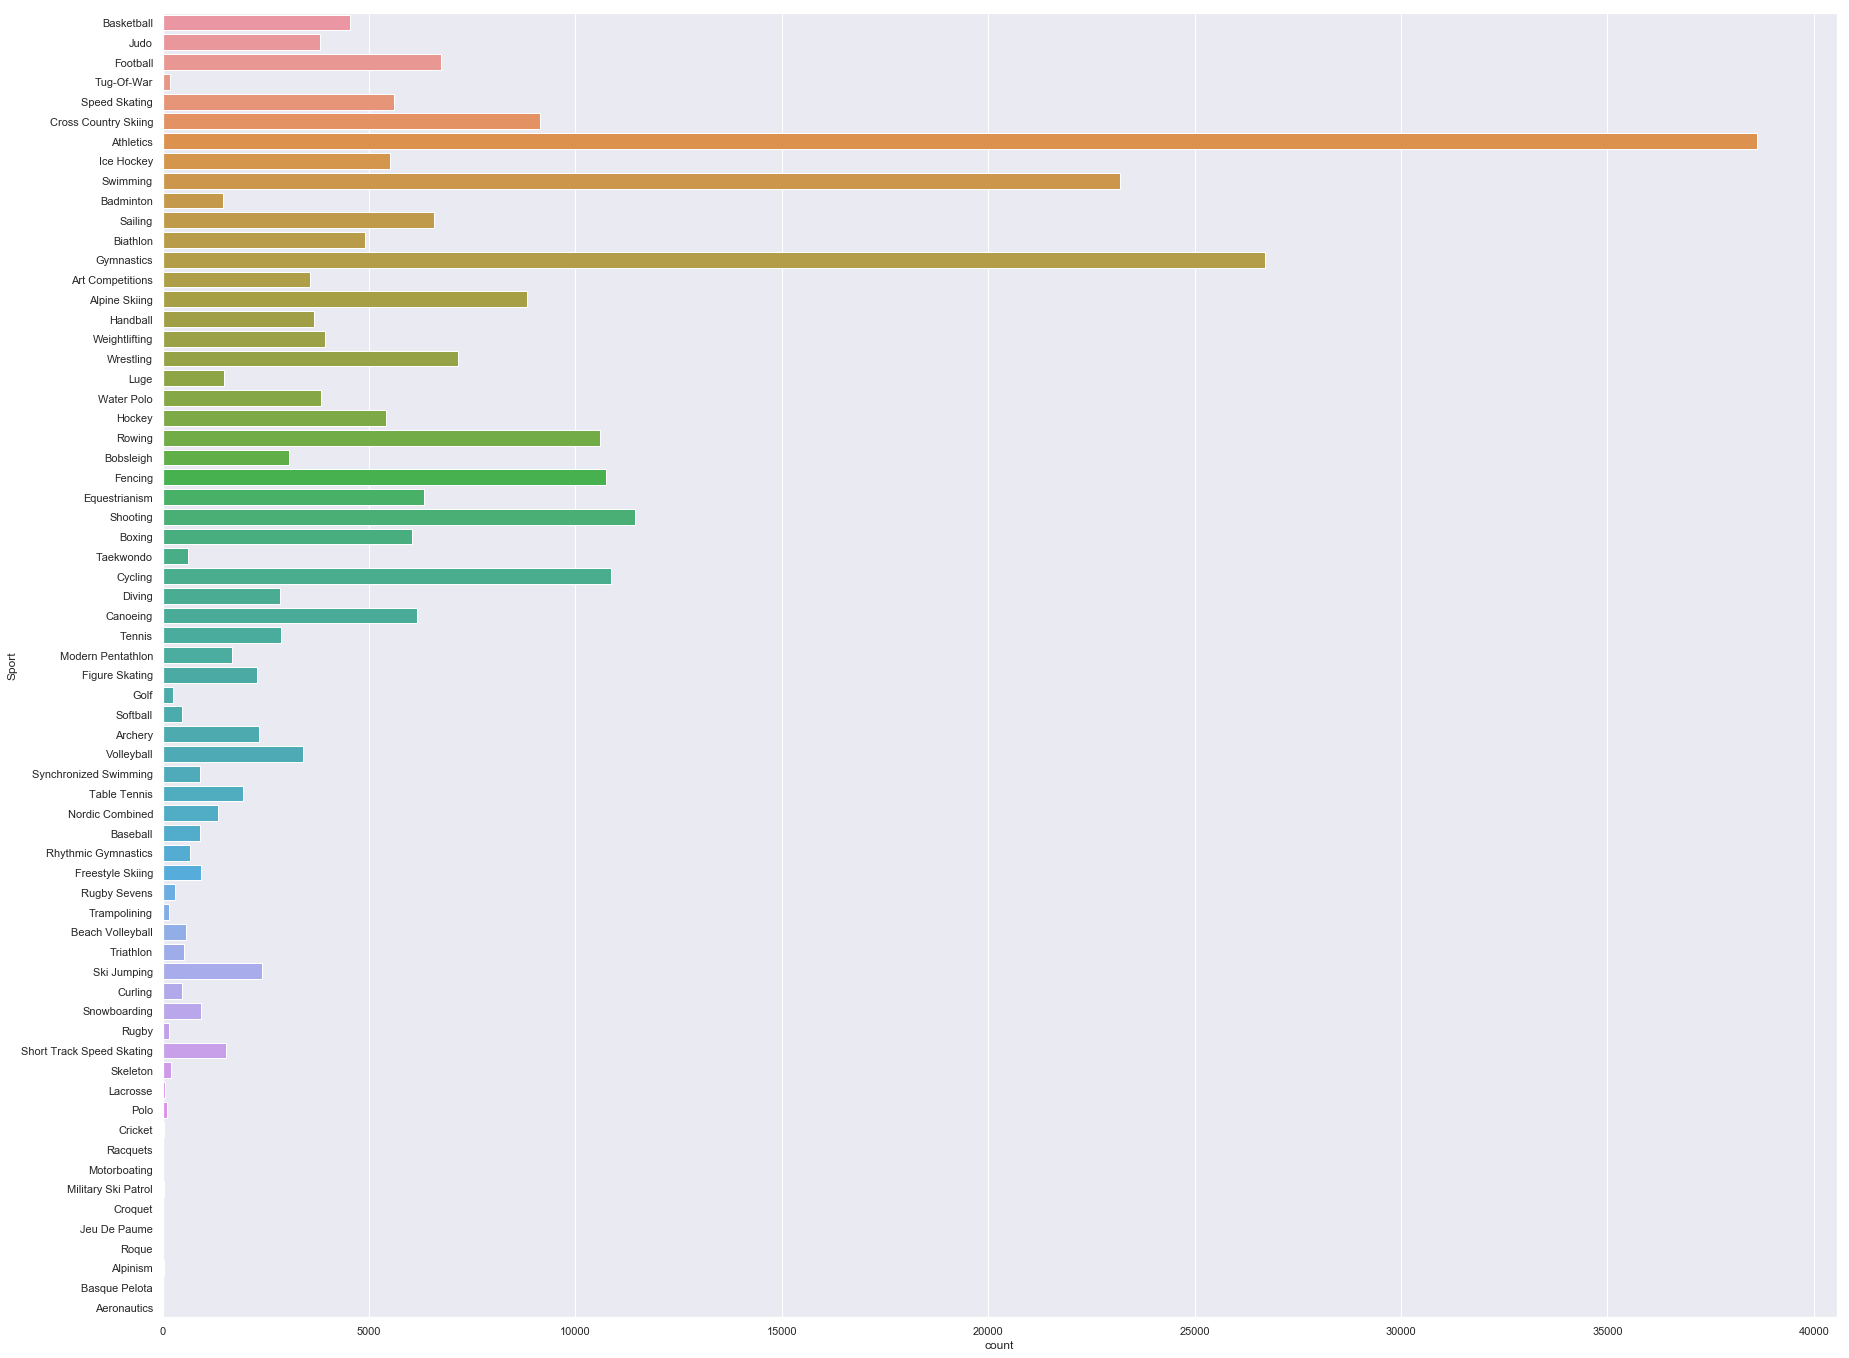

In [51]:
f, axes = plt.subplots(1, 1, figsize=(30, 24))
sb.countplot(y='Sport', data=olympicData)

# checking how data looks like for the sports that have very low counts according to countplot

In [52]:
yearCricket = olympicData[olympicData['Sport'].isin(['Cricket'])]
yearRacquets = olympicData[olympicData['Sport'].isin(['Racquets'])]
yearMotorboating = olympicData[olympicData['Sport'].isin(['Motorboating'])]
yearMilitarySkiPatrol = olympicData[olympicData['Sport'].isin(['Military Ski Patrol'])]
yearCroquet = olympicData[olympicData['Sport'].isin(['Croquet'])]
yearJeuDePaume = olympicData[olympicData['Sport'].isin(['Jeu De Paume'])]
yearRoque = olympicData[olympicData['Sport'].isin(['Roque'])]
yearAlpinism = olympicData[olympicData['Sport'].isin(['Alpinism'])]
yearBasquePelota = olympicData[olympicData['Sport'].isin(['Basque Pelota'])]
yearAeronautics = olympicData[olympicData['Sport'].isin(['Aeronautics'])]

print('Unique years :  \nCricket', yearCricket['Year'].unique())
print('Racquets', yearRacquets['Year'].unique(), '\nMotorboating', yearMotorboating['Year'].unique())
print('Military Ski Patrol', yearMilitarySkiPatrol['Year'].unique(), '\nCroquet', yearCroquet['Year'].unique())
print('Jeu De Paume', yearJeuDePaume['Year'].unique(), '\nRoque', yearRoque['Year'].unique())
print('Alpinism', yearAlpinism['Year'].unique(), '\nBasque Pelota', yearBasquePelota['Year'].unique())
print('Aeronautics', yearAeronautics['Year'].unique())

Unique years :  
Cricket [1900]
Racquets [1908] 
Motorboating [1908]
Military Ski Patrol [1924] 
Croquet [1900]
Jeu De Paume [1908] 
Roque [1904]
Alpinism [1924 1936 1932] 
Basque Pelota [1900]
Aeronautics [1936]


In [53]:
# let us find out other sports that have data for only a year
sportYear = pd.DataFrame(olympicData[['Sport','Year']])
sportYear.drop_duplicates(inplace = True)

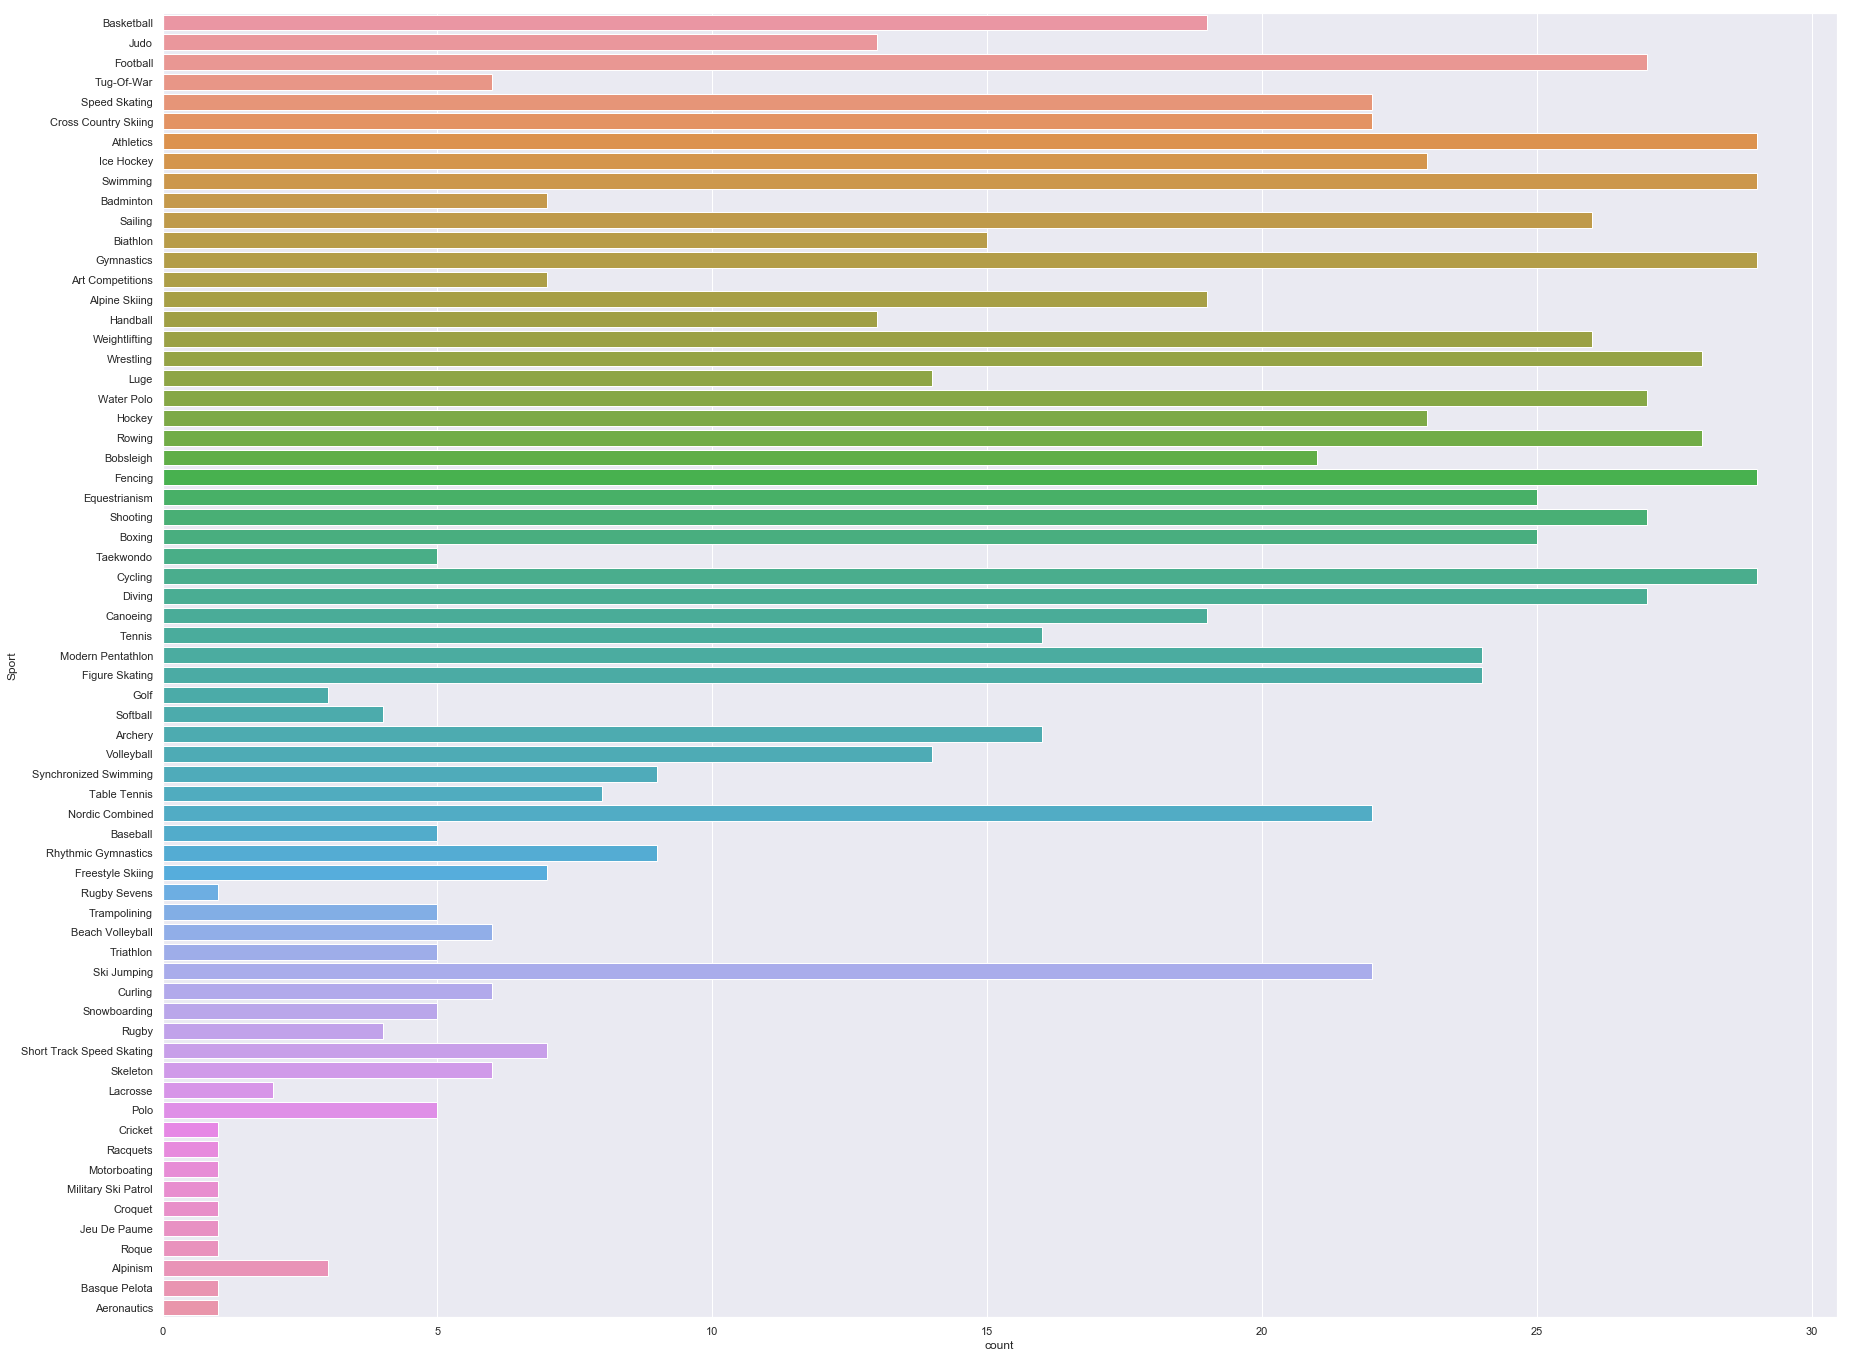

In [54]:
f, axes = plt.subplots(1, 1, figsize=(30, 24))
sb.countplot(y='Sport', data = sportYear)

# We can see from the above plot, that 'Rugby Sevens' also exists just for one year

# Removing above sports as they existed only for a year, they have low count and contain missing values in Height, Weight or Age

In [55]:
sportCol = ['Cricket','Racquets','Motorboating','Military Ski Patrol','Croquet','Jeu De Paume','Roque','Alpinism','Basque Pelota','Aeronautics','Rugby Sevens']
olympicData = olympicData[~olympicData['Sport'].isin(sportCol)]

In [56]:
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270678 entries, 0 to 271115
Data columns (total 12 columns):
ID        270678 non-null int64
Sex       270678 non-null object
Age       261231 non-null float64
Height    210643 non-null float64
Weight    207941 non-null float64
Team      270678 non-null object
NOC       270678 non-null object
Year      270678 non-null int64
Season    270678 non-null object
Sport     270678 non-null object
Event     270678 non-null object
Medal     270678 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 26.8+ MB


# Filling the NaN Height, Weight, Age with mean for every country and sex

In [57]:
#Making a new DF with only these columns
CalcMean = olympicData[['Height', 'Weight','Age','NOC','Sex']]
#Finding out mean height, weight and age for each NOC + Sex combination
AvgData = CalcMean.groupby(['NOC', 'Sex']).mean().round(0)
#Renaming the columns, so it is easier to understand their meanings later
AvgData.rename(columns={'Height': 'AvgHeight', 'Weight': 'AvgWeight', 'Age':'AvgAge'}, inplace=True)
AvgData.head()

AvgHeight  AvgWeight  AvgAge
NOC Sex                              
AFG F        170.0       58.0    20.0
    M        171.0       67.0    24.0
AHO F        170.0       59.0    24.0
    M        178.0       78.0    27.0
ALB F        165.0       57.0    27.0

In [58]:
olympicData.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
0,1,M,24.0,180.0,80.0,China,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NoMedal
1,2,M,23.0,170.0,60.0,China,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NoMedal
2,3,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Football,Football Men's Football,NoMedal
3,4,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NoMedal


# So, we notice that ID 3 and 4 have missing Height and Weight values, this will be used for verification later

In [59]:
# merging main DF with the average data DF to get the average values as separate columns
olympicData = pd.merge(olympicData, AvgData, on = ['NOC','Sex'])

In [60]:
#Assigning average values to missing values
olympicData['Height'] = olympicData['Height'].fillna(olympicData['AvgHeight'])
olympicData['Weight'] = olympicData['Weight'].fillna(olympicData['AvgWeight'])
olympicData['Age'] = olympicData['Age'].fillna(olympicData['AvgAge'])

In [61]:
#sort by id and verify
olympicData.sort_values(['ID']).head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal,AvgHeight,AvgWeight,AvgAge
0,1,M,24.0,180.0,80.0,China,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NoMedal,178.0,73.0,24.0
1,2,M,23.0,170.0,60.0,China,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NoMedal,178.0,73.0,24.0
2371,3,M,24.0,182.0,78.0,Denmark,DEN,1920,Summer,Football,Football Men's Football,NoMedal,182.0,78.0,28.0
2372,4,M,34.0,182.0,78.0,Denmark/Sweden,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,182.0,78.0,28.0
5233,5,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,NoMedal,172.0,64.0,24.0


In [62]:
olympicData['Height'] = olympicData['Height']/100 #converting height into metres

In [63]:
olympicData['BMI'] = olympicData['Weight']/(olympicData['Height']** 2).round(2) #calculating BMI

# now we can remove the NaN values as their count is very low

In [64]:
#they are not needed any more
olympicData.drop(columns=['AvgHeight', 'AvgWeight','AvgAge'], inplace = True)
#Before removing missing values
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270678 entries, 0 to 270677
Data columns (total 13 columns):
ID        270678 non-null int64
Sex       270678 non-null object
Age       270665 non-null float64
Height    270570 non-null float64
Weight    270421 non-null float64
Team      270678 non-null object
NOC       270678 non-null object
Year      270678 non-null int64
Season    270678 non-null object
Sport     270678 non-null object
Event     270678 non-null object
Medal     270678 non-null object
BMI       270419 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 28.9+ MB


In [65]:
olympicData.dropna(inplace = True)
#After removing missing values
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270419 entries, 0 to 270675
Data columns (total 13 columns):
ID        270419 non-null int64
Sex       270419 non-null object
Age       270419 non-null float64
Height    270419 non-null float64
Weight    270419 non-null float64
Team      270419 non-null object
NOC       270419 non-null object
Year      270419 non-null int64
Season    270419 non-null object
Sport     270419 non-null object
Event     270419 non-null object
Medal     270419 non-null object
BMI       270419 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 28.9+ MB


In [66]:
#Let us see how many different sports we have
olympicData['Sport'].unique().size

55

In [98]:
#Converting Sex into numeric values, so it can be used as a predictor
Sex = {'Sex' : {'M':0, 'F':1}} 
olympicData.replace(Sex, inplace=True)
olympicData.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal,BMI
270671,82054,1,20.0,1.61,55.0,Rhodesia,RHO,1960,Summer,Diving,Diving Women's Springboard,NoMedal,21.235521
270672,85713,1,18.0,1.68,56.0,South Vietnam,VNM,1968,Summer,Swimming,Swimming Women's 100 metres Freestyle,NoMedal,19.858156
270673,85729,1,17.0,1.58,52.0,South Vietnam,VNM,1968,Summer,Swimming,Swimming Women's 100 metres Backstroke,NoMedal,20.800000
270674,93087,1,23.0,1.70,90.0,Nauru,NRU,2000,Summer,Weightlifting,Weightlifting Women's Super-Heavyweight,NoMedal,31.141869
270675,112970,1,22.0,1.65,136.0,Nauru,NRU,2004,Summer,Weightlifting,Weightlifting Women's Super-Heavyweight,NoMedal,50.000000


In [114]:
#Extract response and predictors
#Important!! play by adding age, or instead of BMI, use height and weight. We can also use country
#predictors = ['BMI', 'Sex']
predictors = ['BMI','Sex','Age','Height','Weight','Year']
#olympicData['Sex'] = olympicData['Sex'].astype('category') 
y = pd.DataFrame(olympicData['Sport'].astype('category'))
X = pd.DataFrame(olympicData[predictors]) 

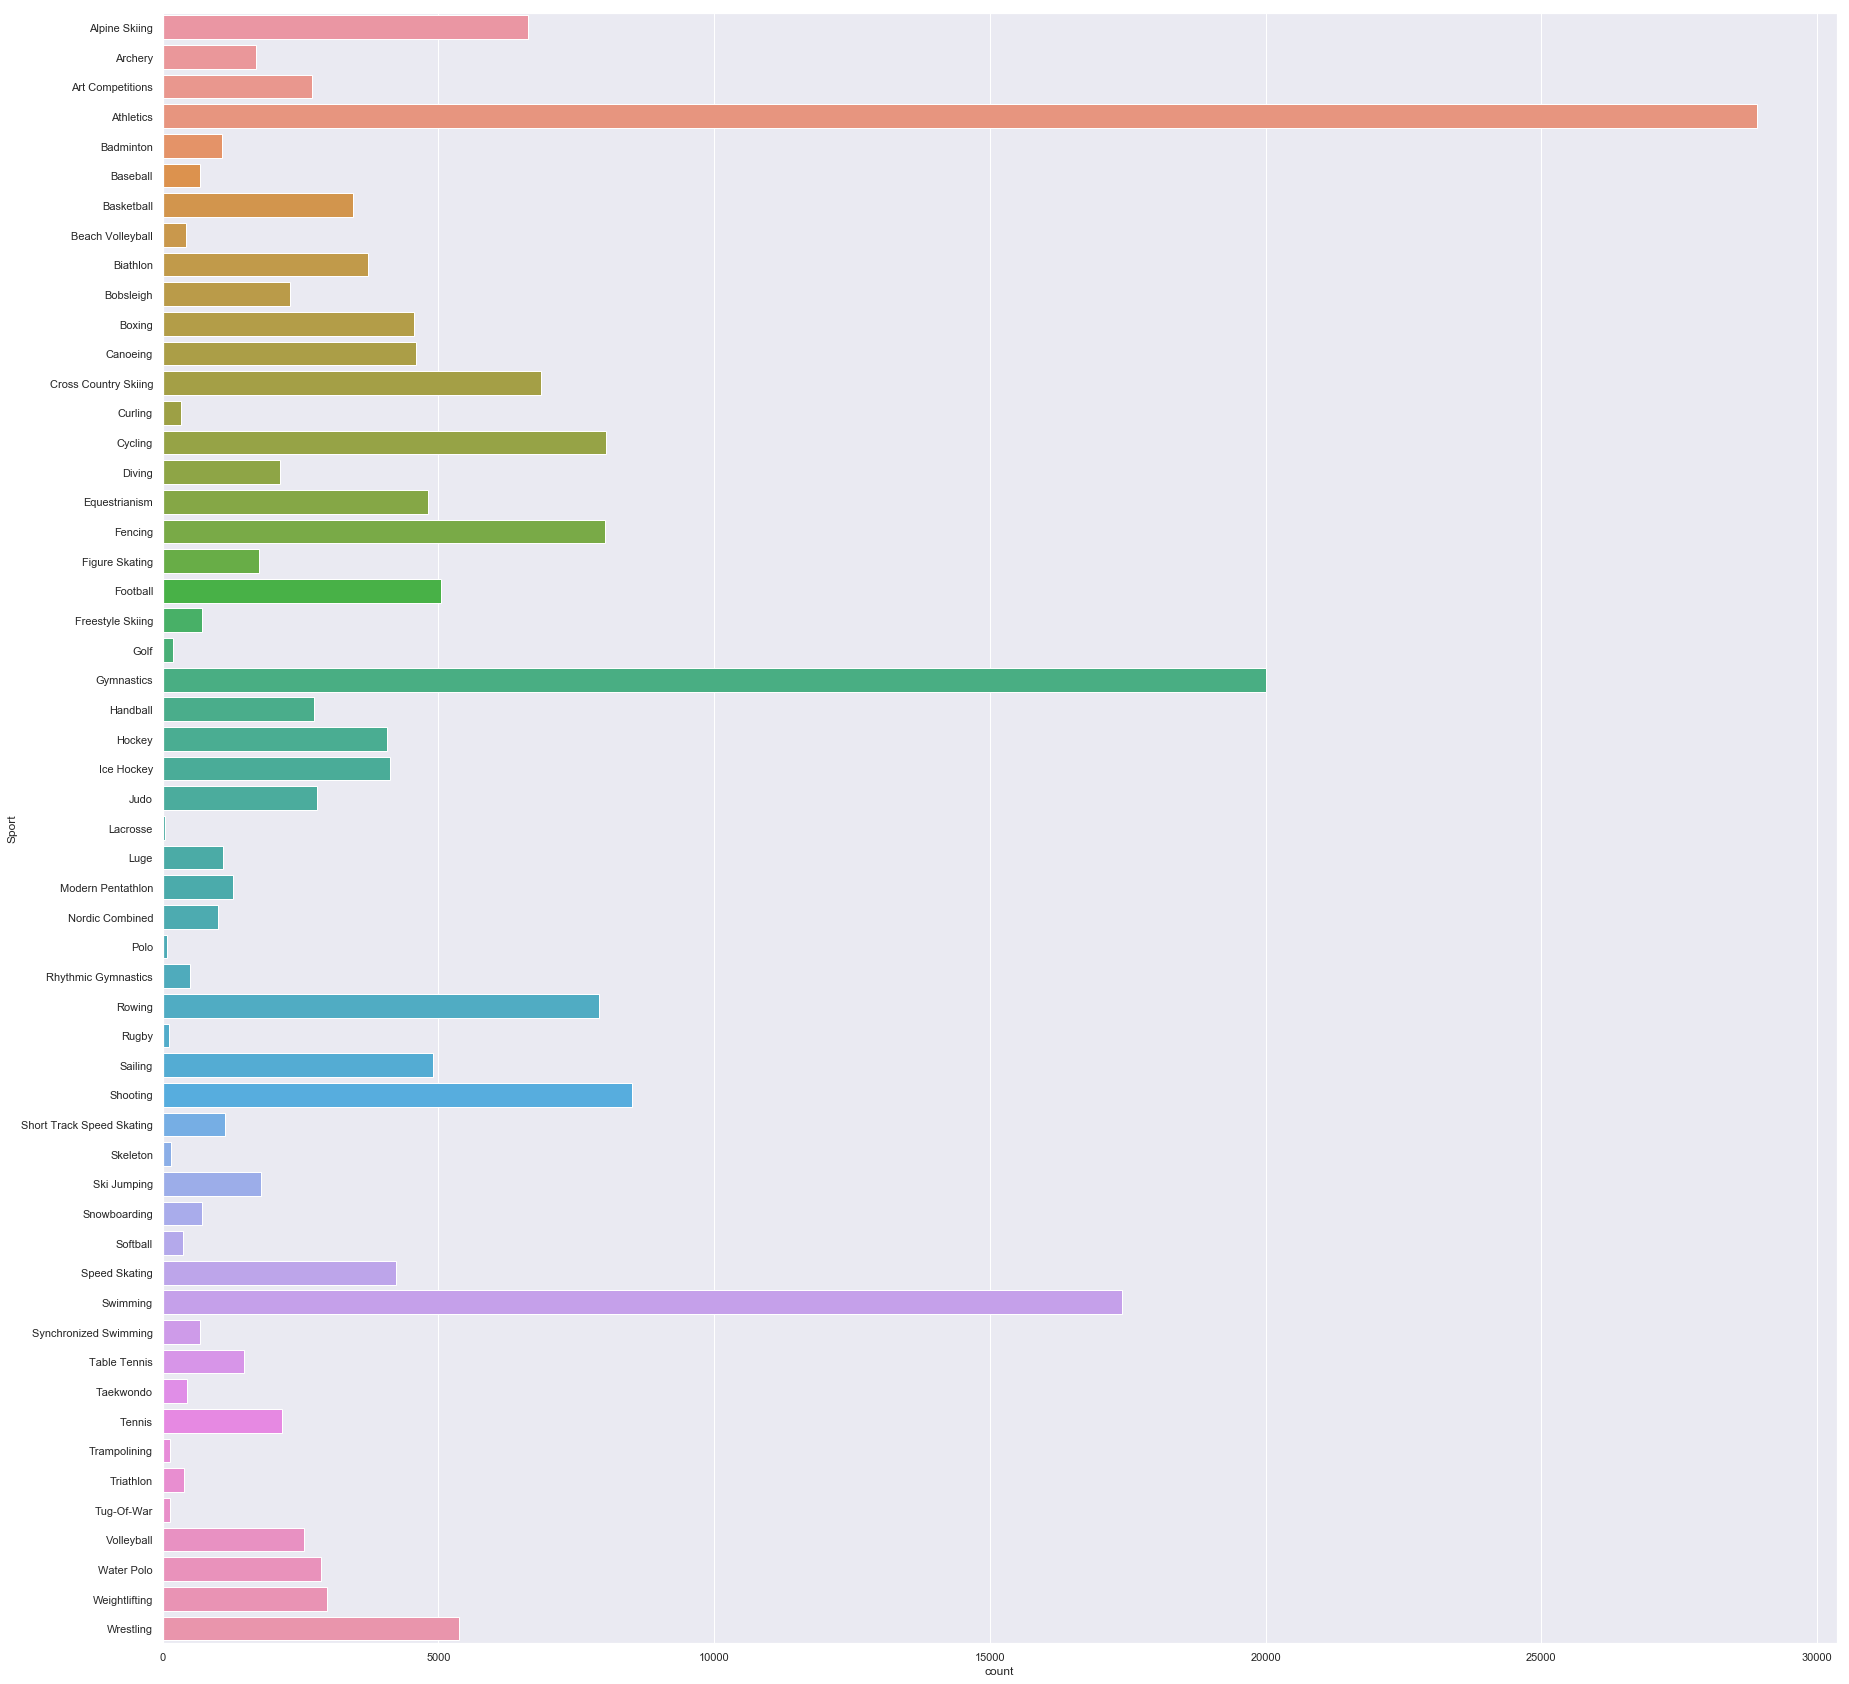

In [115]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
f, axes = plt.subplots(1, 1, figsize=(30, 30))
sb.countplot(y = y_train['Sport'])

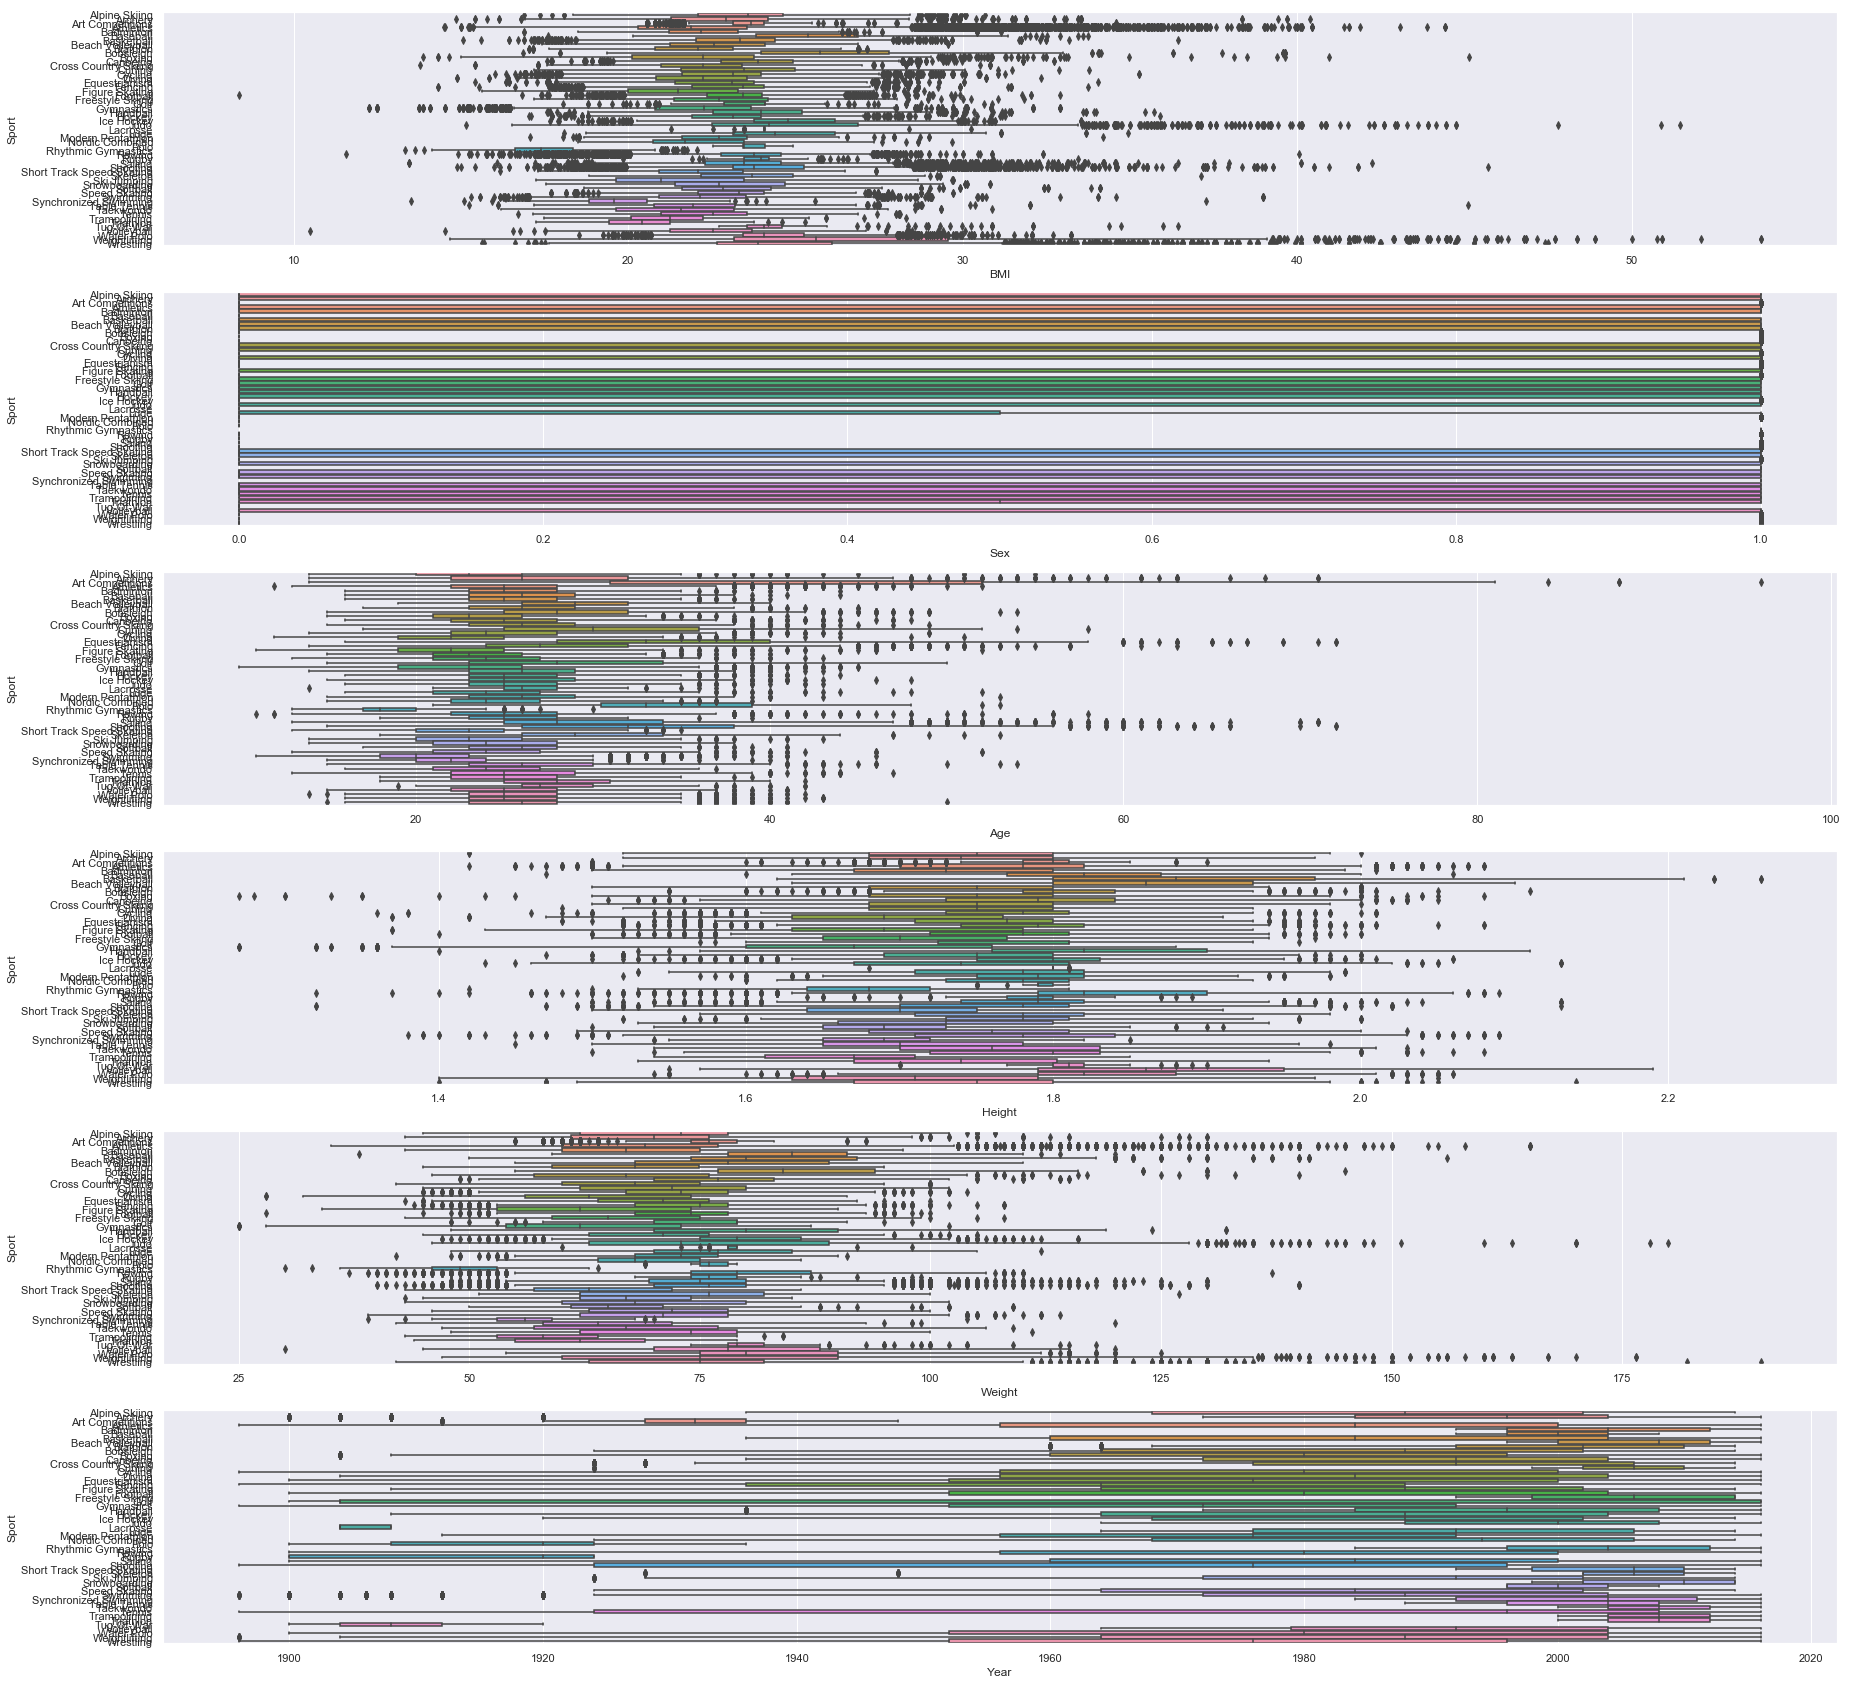

In [116]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1, join_axes = [y_train.index])

f, axes = plt.subplots(6, 1, figsize=(30, 30))

#sb.boxplot(x = 'BMI', y = 'Sport', data = trainDF, orient = 'h')

count = 0
for var in X_train:
    sb.boxplot(x = var, y = 'Sport', data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [117]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.22530495922372223

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.22523481990976998



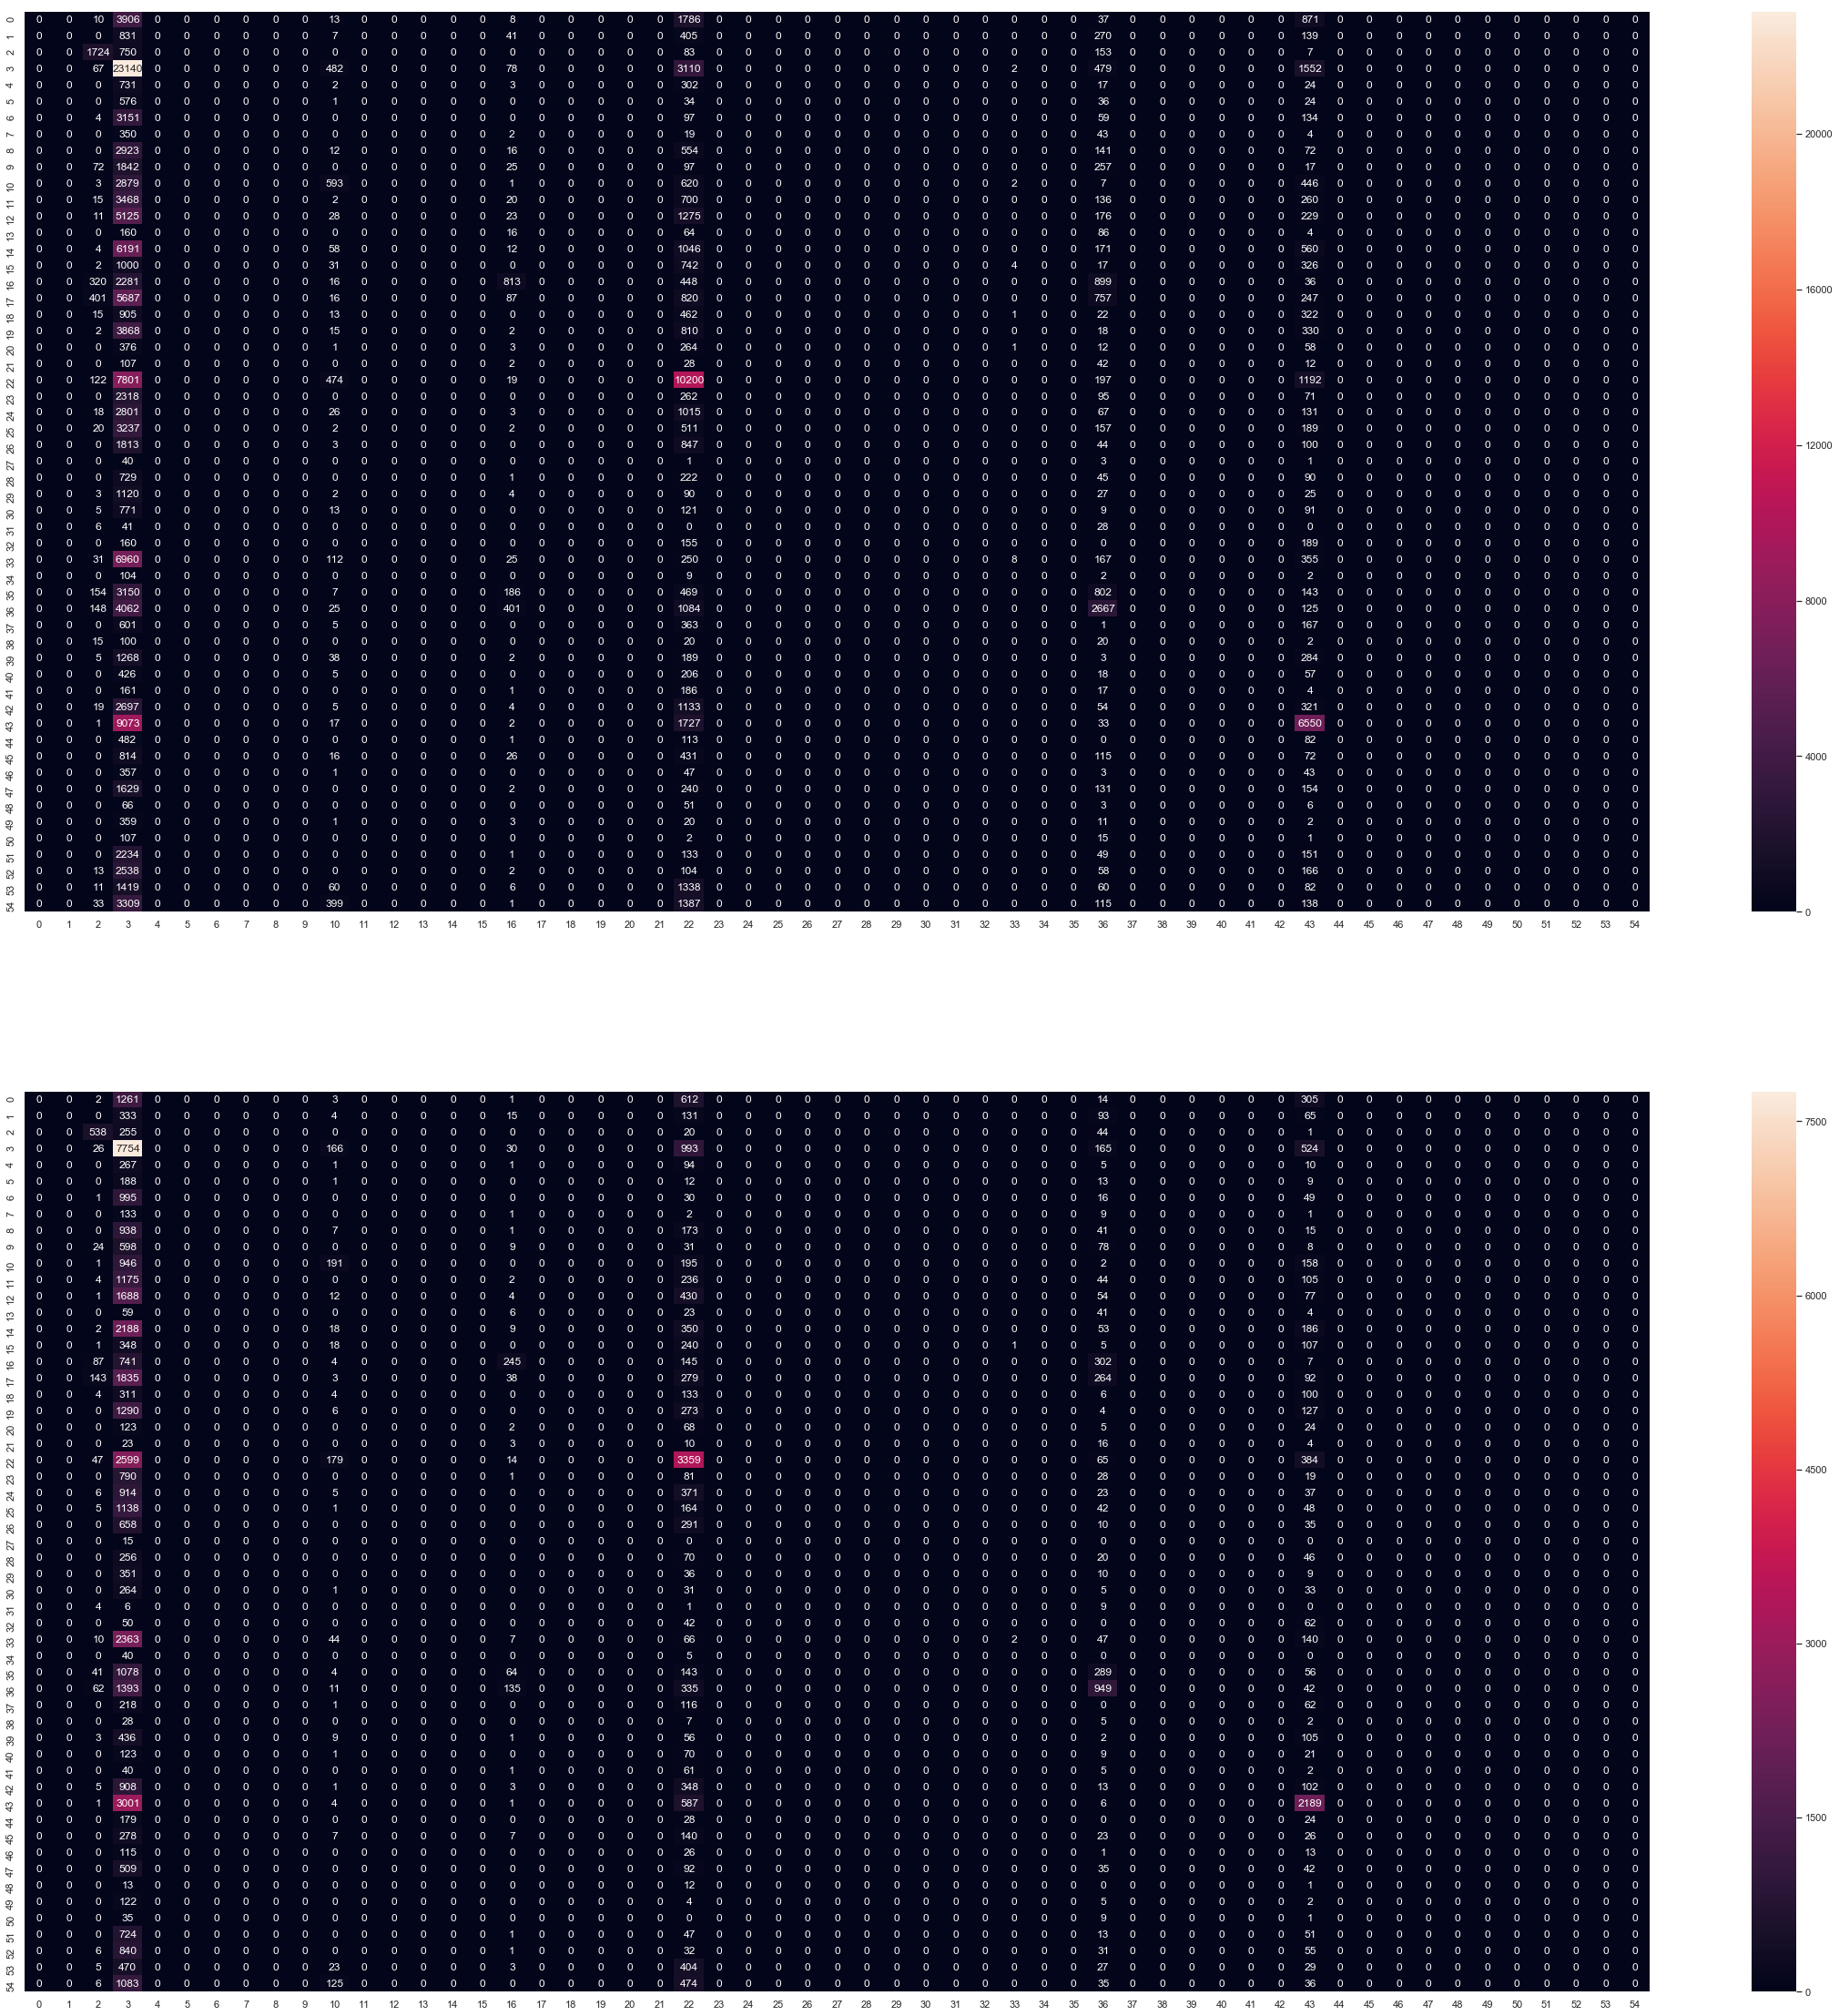

In [118]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(40, 40))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 12}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 12}, ax = axes[1])

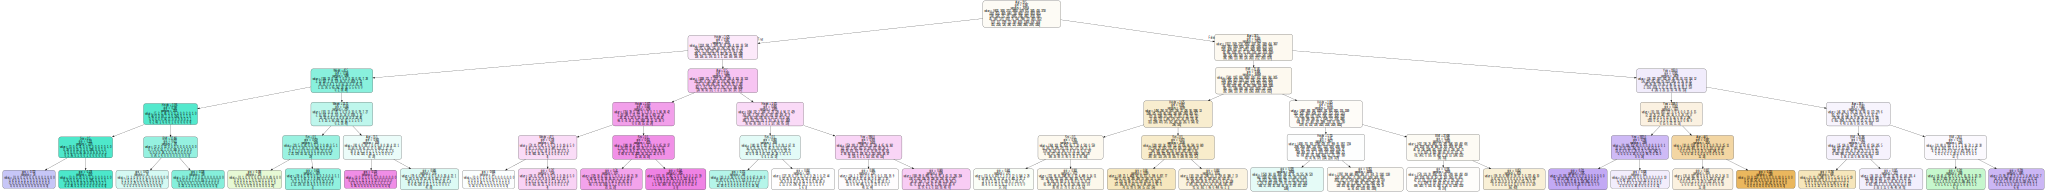

In [120]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

In [121]:
# Extract IDs of players for Prediction
olympicData_pred = olympicData[olympicData["ID"].isin([1, 5, 10])]
olympicData_pred

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal,BMI
0,1,0,24.0,1.80,80.0,China,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NoMedal,24.691358
5231,5,1,21.0,1.85,82.0,Netherlands,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NoMedal,23.976608
5232,5,1,21.0,1.85,82.0,Netherlands,NED,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NoMedal,23.976608
5233,5,1,25.0,1.85,82.0,Netherlands,NED,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,NoMedal,23.976608
5234,5,1,25.0,1.85,82.0,Netherlands,NED,1992,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NoMedal,23.976608
5235,5,1,27.0,1.85,82.0,Netherlands,NED,1994,Winter,Speed Skating,Speed Skating Women's 500 metres,NoMedal,23.976608
5236,5,1,27.0,1.85,82.0,Netherlands,NED,1994,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NoMedal,23.976608
20457,10,0,26.0,1.78,74.0,Finland,FIN,1952,Summer,Swimming,Swimming Men's 400 metres Freestyle,NoMedal,23.343849


In [122]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(olympicData_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array(['Athletics', 'Athletics', 'Athletics', 'Athletics', 'Athletics',
       'Athletics', 'Athletics', 'Athletics'], dtype=object)

In [123]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = olympicData_pred.index)
olympicData_acc = pd.concat([olympicData_pred[["ID", "Sport"]], y_pred], axis = 1)

olympicData_acc

,ID,Sport,PredType
0,1,Basketball,Athletics
5231,5,Speed Skating,Athletics
5232,5,Speed Skating,Athletics
5233,5,Speed Skating,Athletics
5234,5,Speed Skating,Athletics
5235,5,Speed Skating,Athletics
5236,5,Speed Skating,Athletics
20457,10,Swimming,Athletics


In [124]:
# Predict Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(X_pred)
np.set_printoptions(precision = 3)
print(y_prob)

[[4.018e-02 5.680e-03 9.803e-03 1.253e-01 4.959e-03 3.993e-03 1.260e-02
  1.038e-03 1.935e-02 1.641e-02 2.265e-02 2.856e-02 3.830e-02 1.024e-03
  5.661e-02 8.693e-03 2.044e-02 4.946e-02 6.055e-03 4.084e-02 3.042e-03
  1.139e-03 8.317e-02 1.214e-02 2.661e-02 2.955e-02 1.380e-02 5.766e-04
  6.833e-03 1.035e-02 5.738e-03 5.911e-04 0.000e+00 4.297e-02 1.355e-03
  2.640e-02 4.279e-02 4.209e-03 6.343e-04 7.684e-03 2.898e-03 1.413e-03
  2.432e-02 4.789e-02 1.442e-04 4.858e-03 1.470e-03 1.026e-02 2.739e-04
  7.929e-04 1.355e-03 6.487e-03 1.777e-02 1.416e-02 3.435e-02]
 [1.992e-02 4.240e-03 6.894e-04 1.356e-01 5.274e-03 7.929e-03 6.167e-02
  6.239e-03 1.696e-02 1.441e-02 1.424e-02 4.237e-02 2.544e-02 1.172e-03
  3.299e-02 1.207e-03 6.619e-03 3.999e-02 2.999e-03 2.155e-02 1.448e-03
  4.481e-04 4.654e-03 3.975e-02 1.500e-02 3.385e-02 8.825e-03 0.000e+00
  6.722e-03 6.274e-03 2.448e-03 0.000e+00 0.000e+00 1.137e-01 3.102e-04
  2.437e-02 1.382e-02 2.172e-03 1.034e-03 1.827e-03 3.654e-03 4.481e-04
 